# 0. Linear regression to MLE

## 0.1 Boston Data



In [1]:
!pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.6/774.6 kB 67.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 71.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 31.0 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=aa59768f2487b89f4c22bc750402fae2d5a74c9cb2341e0387ee3a4ff52a85f6
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    

In [23]:
import ISLP
import torch

In [24]:
Auto = ISLP.load_data("Auto")

X = torch.tensor(Auto["horsepower"])
Y = torch.tensor(Auto["mpg"])


Now you want to model

```
Y ~ X + X^2
```

In [70]:
print(X.shape, Y.shape)
n=X.shape[0]
n

torch.Size([392]) torch.Size([392])


392

In [26]:
ones = torch.ones([X.shape[0]])
XX = torch.stack([ones, X, X*X], axis=1)
XX.shape

X_mean = torch.mean(XX, axis=0)
X_sd = torch.std(XX, axis=0)
XX = (XX-X_mean)/X_sd

XX[:, 0]=torch.ones([1])
XX

tensor([[ 1.0000,  0.6633,  0.4594],
        [ 1.0000,  1.5726,  1.5115],
        [ 1.0000,  1.1829,  1.0300],
        ...,
        [ 1.0000, -0.5318, -0.5437],
        [ 1.0000, -0.6617, -0.6267],
        [ 1.0000, -0.5838, -0.5775]])

In [ ]:
XX

In [72]:
XX

tensor([[ 1.0000,  0.6633,  0.4594],
        [ 1.0000,  1.5726,  1.5115],
        [ 1.0000,  1.1829,  1.0300],
        ...,
        [ 1.0000, -0.5318, -0.5437],
        [ 1.0000, -0.6617, -0.6267],
        [ 1.0000, -0.5838, -0.5775]])

In [73]:
XX[:, 0]=torch.ones([1])
XX

tensor([[ 1.0000,  0.6633,  0.4594],
        [ 1.0000,  1.5726,  1.5115],
        [ 1.0000,  1.1829,  1.0300],
        ...,
        [ 1.0000, -0.5318, -0.5437],
        [ 1.0000, -0.6617, -0.6267],
        [ 1.0000, -0.5838, -0.5775]])

## 0.2 Train the model by minimizing MSE

In [74]:
from torch.utils.data import Dataset, DataLoader, TensorDataset
dataset = TensorDataset(XX,Y.reshape([n,1]))
trainloader = DataLoader(dataset=dataset, batch_size=10, shuffle=True)

Now train the linear model.

In [75]:
model = torch.nn.Linear(3, 1, bias=False)
def criterion(yhat, y):
  return torch.mean((yhat-y)**2)
my_optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [76]:
XX[:3, :]

tensor([[1.0000, 0.6633, 0.4594],
        [1.0000, 1.5726, 1.5115],
        [1.0000, 1.1829, 1.0300]])

In [77]:
epochs=100
history=[]
n=len(XX)

for epoch in range(epochs):
  LOSS_sum = 0
  for xx, yy in trainloader:
    yhat = model(xx)
    loss = criterion(yhat, yy)
    LOSS_sum = LOSS_sum + loss * len(yy)
    my_optimizer.zero_grad()
    loss.backward()
    my_optimizer.step()
  history.append(LOSS_sum.item()/n)


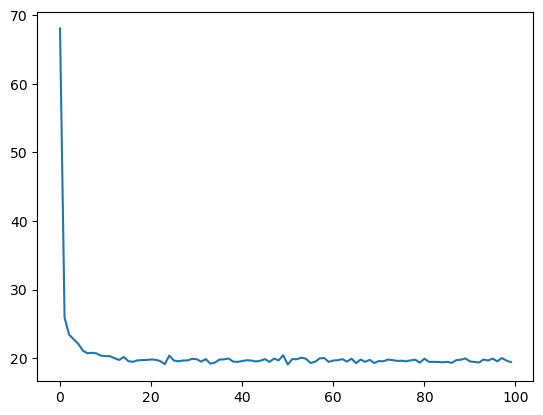

In [78]:
import matplotlib.pyplot as plt
plt.plot(history)

In [79]:
Yhat = model(XX)

torch.mean((Yhat.reshape([-1]) - Y.reshape([-1]))**2)

tensor(19.1966, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [80]:
torch.mean((torch.mean(Y) - Y.reshape([-1]))**2)

tensor(60.7627, dtype=torch.float64)

In [81]:
list(model.parameters())

[Parameter containing:
 tensor([[ 23.0018, -17.9164,  11.9283]], requires_grad=True)]

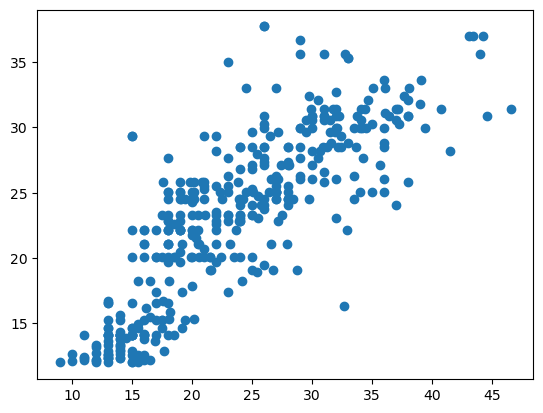

In [82]:
plt.scatter(Y.detach().numpy(), Yhat.detach().numpy())

## 0.3 Train the model by MLE method

Here in linear regression so far, your loss function is given by

```
loss(yy, yhat)
```
where `loss(yy, yhat)` is defined by

$\frac{1}{n}\sum\limits_{i=1}^n \left( y_i-\widehat{y}_i\left(x_i; \beta\right)\right)^2$. We estimate $\beta = \widehat{\beta}$ by minimizing the above loss function.

However, in actual linear regression, we use maximum likelihood estimation method (MLE) where the loss function is defined by log-likelihood function by assuming

$
y_i\sim N\left( \widehat{y_i}(x_i, \beta),\,\, \sigma^2 \right).
$

We calculate a log-likelihood function by
$
\ell(\beta, \sigma) := \sum\limits_{i=1}^{n} \log\left(f\left(y_i; \widehat{y_i}, \, \sigma^2   \right)\right)
$

where

$f\left(y; \mu, \, \sigma^2   \right)=\frac{1}{\sqrt{2\pi}\sigma}\exp\left(- \frac{\left( y-\mu\right)^2}{2\sigma^2}\right)$




As a result, we have parameters $\sigma^2$ as well as $\beta$. Now, let's do estimation using MLE by maximizing $\ell(\beta, \sigma)$.



In [18]:
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader

In [9]:
np.log(torch.pi)

1.1447298858494002

In [29]:
model = torch.nn.Linear(3, 1, bias=False)
log_sigma = torch.tensor(torch.rand([1])*0.01, requires_grad=True)
def criterion(yhat, y):
  log_lik = -torch.mean( -1/2 *np.log(2*torch.pi)-log_sigma+(-(y-yhat)**2)/(2*torch.exp(log_sigma)**2) )
  #log_lik = -torch.mean( -log_sigma+(-(y-yhat)**2)/(2*torch.exp(log_sigma)**2) )
  return log_lik
my_optimizer = torch.optim.SGD(list(model.parameters())+[log_sigma], lr=0.05)

dataset = TensorDataset(XX, Y)
trainloader = DataLoader(dataset=dataset, batch_size=10, shuffle=True)

/var/folders/vl/yt67rw7s1tl_87hvr6bgvvw00000gn/T/ipykernel_14464/3065729652.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  log_sigma = torch.tensor(torch.rand([1])*0.01, requires_grad=True)


In [30]:
epochs=500
history=[]

for epoch in range(epochs):
  LOSS_sum = 0
  for xx, yy in trainloader:
    yhat = model(xx)
    loss = criterion(yhat, yy)
    LOSS_sum = LOSS_sum + loss * len(yy)
    my_optimizer.zero_grad()
    loss.backward()
    my_optimizer.step()
  history.append(LOSS_sum.item()/len(trainloader.dataset))

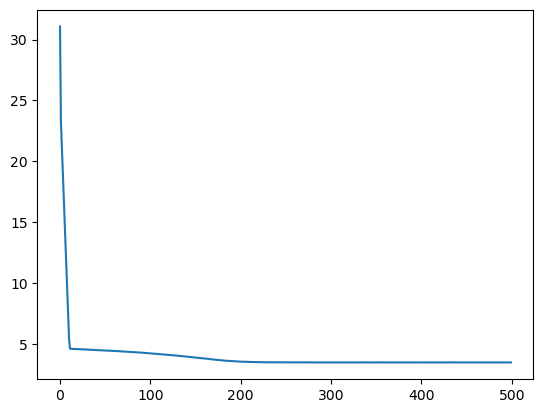

In [32]:
import matplotlib.pyplot as plt
plt.plot(history)

In [88]:
list(model.parameters())

[Parameter containing:
 tensor([[23.4544, -9.0080,  3.1274]], requires_grad=True)]

In [89]:
Yhat = model(XX)

torch.mean((Yhat.reshape([-1]) - Y.reshape([-1]))**2)

tensor(21.7278, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [90]:
torch.mean((torch.mean(Y) - Y.reshape([-1]))**2)

tensor(60.7627, dtype=torch.float64)

## Exercise 0.1

The loss function can be conveniently written using `torch.distributions.normal.Normal` function. Repeat the traning procedure using new loss function defined by `torch.distributions.normal.Normal` function. Answer the following questions:

1> Calculate MSE.

2> Calculate AIC.

3> Assume that `horsepower=14.0`. Calculate the corresponding predictive value of `mpg`, $\widehat{y}_i$.

Hint:
Here is hot to define Exponential distribution



```
rate = 10 # mean of exponential distribution
m = torch.distributions.exponential.Exponential(torch.tensor([rate]))
```

Here is how to do random sample from $X\sim$ Exponential distribution of mean 10.0:
```
m.sample([10])
```

With the following, we calculate $P(X\le x)=1-\exp(x)$
```
x=2.0
m.cdf(x)
```

With the following, we calculate log-likelihood function at $X=x$ which is written by

$\log\left(f_X(x)\right)= - \log(rate) - \frac{x}{rate}$


```
m.log_prob(x)
```

In [91]:
model = torch.nn.Linear(3, 1, bias=False)
log_sigma = torch.tensor(torch.rand([1]), requires_grad=True)
# def criterion(yhat, y):
#   log_lik = -torch.mean( -1/2 *np.log(2*torch.pi)-log_sigma-(y-yhat)**2)/(2*torch.exp(log_sigma)**2)
#   return log_lik
def criterion(yhat, y):
  m = torch.distributions.normal.Normal(yhat, torch.exp(log_sigma), validate_args=None)
  log_lik = -torch.mean(m.log_prob(y))
  return log_lik
my_optimizer = torch.optim.SGD(list(model.parameters())+[log_sigma], lr=0.01)

/var/folders/vl/yt67rw7s1tl_87hvr6bgvvw00000gn/T/ipykernel_36252/968406915.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  log_sigma = torch.tensor(torch.rand([1]), requires_grad=True)


In [92]:
epochs=50
history=[]
n=len(XX)

for epoch in range(epochs):
  LOSS_sum = 0.0
  for xx, yy in trainloader:
    yhat = model(xx)
    loss = criterion(yhat, yy)
    LOSS_sum = LOSS_sum + loss * len(yy)
    my_optimizer.zero_grad()
    loss.backward()
    my_optimizer.step()
  history.append(LOSS_sum.item()/n)


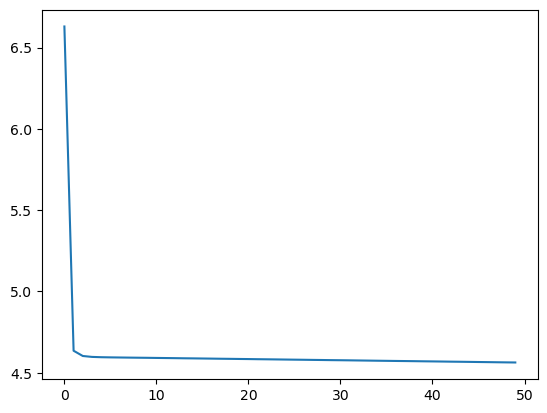

In [93]:
plt.plot(history)

In [94]:
# AIC

Yhat = model(XX)
Yhat.shape

torch.Size([392, 1])

In [95]:
list(model.parameters())

[Parameter containing:
 tensor([[ 1.3724, -0.6106, -0.3799]], requires_grad=True)]

In [96]:
XX

tensor([[ 1.0000,  0.6633,  0.4594],
        [ 1.0000,  1.5726,  1.5115],
        [ 1.0000,  1.1829,  1.0300],
        ...,
        [ 1.0000, -0.5318, -0.5437],
        [ 1.0000, -0.6617, -0.6267],
        [ 1.0000, -0.5838, -0.5775]])

In [97]:
Y.shape

torch.Size([392])

In [98]:
2*4 + 2*criterion(Yhat, Y.reshape([-1,1]))

tensor(17.1246, dtype=torch.float64, grad_fn=<AddBackward0>)

In [99]:
Y.reshape([-1,1]).shape

torch.Size([392, 1])

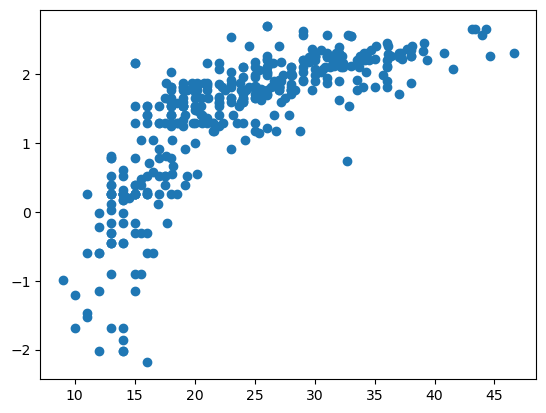

In [100]:
plt.scatter(Y.detach().numpy(), Yhat.detach().numpy().reshape([-1]))

In [101]:
#MSE

torch.mean((Y.reshape([-1,1])-Yhat)**2)



tensor(537.3603, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [102]:
torch.mean((Y.reshape([-1,1])-torch.mean(Y))**2)

tensor(60.7627, dtype=torch.float64)

# 1. Poisson regression with Python

Assume

$y_i \sim {\rm Pois}(\lambda_i)\quad$   for $\quad i=1, \cdots, n$

where $\lambda_i=\exp(X_iW)$.

Then likelihood function is given by

$L(W):=\prod\limits_{i=1}^{n} f_{W}(y_i; X_i)$

where

$f_{W}(y_i; X_i)=
\frac{\exp(-\lambda_i)\lambda_i^{y_i}}{y_i !}
$

Equivalently, we have the following log-likelihood function:

$
\ell(W)=\frac{1}{n}\sum\limits_{i=1}^{n}\log\left( f_W(y_i; X_i)\right)
$

In [38]:
torch.exp(torch.lgamma(torch.tensor([3])))

tensor([2.])

We first start with by

1> Defining `Lambda = X @ W`

2> Defining loss function:
```
def my_log_lik(lambda, y):
  temp  torch.sum(-lambda + y * torch.log(lambda) -  torch.lgamma(torch.tensor(y+1)))
```

Here, note that $\Gamma(n+1)=n$, and log of Gamma function can be calculated by

```
x=3.0
torch.lgamma(torch.tensor(x))
```
which is equivalent with $\log\left(\Gamma(3.0)\right)=\log(2!)=\log(2)$.



Define

$\lambda_i = \widehat{y}_i=\exp\left( X_i\beta\right)$

and use `model` function to define $\widehat{y}_i$.



In [103]:
n

392

In [ ]:

m=2000
x1 = torch.randn([m])
x2 = torch.randn([m])
ones = torch.ones([m])
XX = torch.stack([ones, x1, x2], axis=1)
bbeta = torch.tensor([[0.2, -0.5, 0.5]]).T
yhat = torch.exp(XX @ bbeta)
mod =  torch.distributions.poisson.Poisson(yhat)
YY = mod.sample()
YY.shape

torch.Size([2000, 1])

In [ ]:
from torch.utils.data import Dataset, DataLoader, TensorDataset
dataset = TensorDataset(XX, YY)
trainloader = DataLoader(dataset=dataset, batch_size=128, shuffle=True)

In [ ]:
beta = torch.tensor(torch.randn([3,1])*0.01, requires_grad=True)
def model(xx):
  temp = torch.exp(xx @ beta)
  return temp
def criterion(yhat, yy):
  temp = -torch.mean(-yhat + yy*torch.log(yhat)-torch.lgamma(yy+1))
  return temp

my_optimizer = torch.optim.SGD([beta], lr=0.01)

<ipython-input-56-43d3720264c1>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  beta = torch.tensor(torch.randn([3,1])*0.01, requires_grad=True)


In [ ]:
epochs=20
history=[]

for epoch in range(epochs):
  LOSS_sum = 0
  for xx, yy in trainloader:
    yhat = model(xx)
    loss = criterion(yhat, yy)
    LOSS_sum = LOSS_sum + loss * len(yy)
    my_optimizer.zero_grad()
    loss.backward()
    my_optimizer.step()
  history.append(LOSS_sum.item()/n)


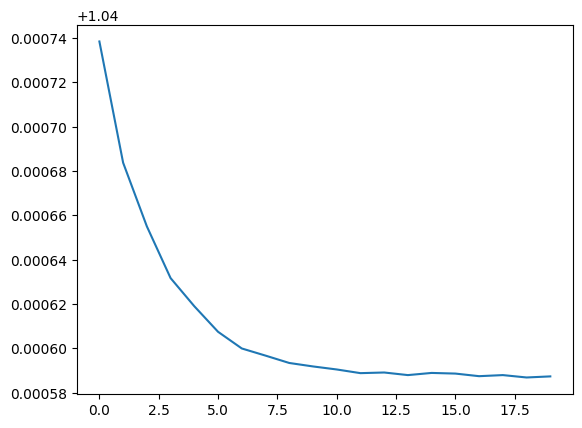

In [ ]:
plt.plot(history)

In [ ]:
beta

tensor([[-0.0029],
        [-0.0169],
        [-0.0131]], requires_grad=True)

In [ ]:
beta

tensor([[ 0.1574],
        [-0.0096],
        [-0.0024]], requires_grad=True)

In [ ]:
Check

### Check your answer with the result by GLM package.

In [ ]:
import statsmodels.api as sm
from ISLP.models import (ModelSpec as MS,
                         summarize)
M_pois = sm.GLM(Y.numpy(), X.numpy(), family=sm.families.Poisson()).fit()
S_pois = summarize(M_pois)

In [ ]:
S_pois

,coef,std err,z,P>|z|
const,-0.0028,0.01,-0.278,0.781
x1,-0.0171,0.01,-1.658,0.097
x2,-0.0130,0.01,-1.256,0.209


## 1.1 Exercise

Answer the following questions.

1> Calculate AIC in the above model.

2> Calculate the train MSE error.

3> Calculate $\widehat{y}_i$ when $X_{i}=[1.0, 0.5, -0.3]$

## 1.2 Exercise:
Do the Poisson regression with the following data. Answer the following questions.

1. Provide the proper Poisson regression model, and train the model using the train dataset. Before the training, you may want to reformulate your data so that it is standardized.

2. After the training, calculate Test MSE. Are you sure your model is better than no model?



In [38]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

In [39]:
from sklearn.datasets import fetch_openml

df = fetch_openml(data_id=41214, as_frame=True, parser="pandas").frame
df.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0,1,0.10,D,5,0,55,50,B12,'Regular',1217,R82
1,3.0,1,0.77,D,5,0,55,50,B12,'Regular',1217,R82
2,5.0,1,0.75,B,6,2,52,50,B12,'Diesel',54,R22
3,10.0,1,0.09,B,7,0,46,50,B12,'Diesel',76,R72
4,11.0,1,0.84,B,7,0,46,50,B12,'Diesel',76,R72


In [40]:
Y = torch.tensor(df["ClaimNb"])[:10000]
xx = torch.tensor( df[["Exposure", "BonusMalus"]].values, dtype=torch.float32)[:10000]

Y_test = torch.tensor(df["ClaimNb"])[10000:20000]
xx_test = torch.tensor( df[["Exposure", "BonusMalus"]].values, dtype=torch.float32)[10000:20000]

In [41]:
n=len(Y)
ones = torch.ones([n,1])
X = torch.concat([ones, xx], axis=1)
X.shape

X_test = torch.concat([ones, xx_test], axis=1)

In [42]:
Y

tensor([1, 1, 1,  ..., 0, 0, 0])

In [43]:
x1_mean=torch.mean(X[:,1])
x2_mean=torch.mean(X[:,2])
x1_std=torch.std(X[:,1])
x2_std=torch.std(X[:,2])
X[:,1]= (X[:,1]-x1_mean)/x1_std
X[:,2]= (X[:,2]-x2_mean)/x2_std

In [44]:
from torch.utils.data import Dataset, DataLoader, TensorDataset
dataset = TensorDataset(X,Y.reshape([n,1]))
trainloader = DataLoader(dataset=dataset, batch_size=512, shuffle=True)
testloader = DataLoader(dataset=dataset, batch_size=n, shuffle=True)